In [1]:
import os
import json
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import plotly.express as px
import pandas as pd

N = 5

In [2]:
def initialize(filePath):
    factory = PokemonFactory("pokemon.json")
    
    with open(filePath, "r") as file:
        config = json.load(file)

    LEVEL = config["level"]
    STATUS = StatusEffect[config["status"]]
    HP_PERCENTAGE = config["hp_percentage"]

    jolteon = factory.create("jolteon", LEVEL, STATUS, HP_PERCENTAGE)
    caterpie = factory.create("caterpie", LEVEL, STATUS, HP_PERCENTAGE)
    snorlax = factory.create("snorlax", LEVEL, STATUS, HP_PERCENTAGE)
    onix = factory.create("onix", LEVEL, STATUS, HP_PERCENTAGE)
    mewtwo = factory.create("mewtwo", LEVEL, STATUS, HP_PERCENTAGE)

    pokemons = [jolteon, caterpie, snorlax, onix, mewtwo]
    pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

    return (pokemons, pokeballs)

In [3]:
def ejercicio1a():
    pokemons, pokeballs = initialize("config/ejercicio1a-config.json")

    # Creamos y llenamos el DataFrame
    df = pd.DataFrame(columns=['pokemon', 'pokeball', 'success'])
    for pokemon in pokemons:
        for pokeball in pokeballs:
            for _ in range(N):
                success, _ = attempt_catch(pokemon, pokeball)
                new_row = {'pokemon': pokemon.name, 'pokeball': pokeball, 'success': success}
                df.loc[len(df)] = new_row

    # Calcular la media de atrapadas para cada Pokémon
    media_por_pokemon_pokeball = df.groupby(['pokemon', 'pokeball'])['success'].mean().reset_index()
    
    # Crear un gráfico de barras con Plotly Express
    fig = px.bar(media_por_pokemon_pokeball, x='pokemon', y='success', color='pokeball', barmode='group', title='Promedio de Atrapadas por Pokémon y Tipo de Pokeball')
    
    # Mostrar el gráfico
    fig.show()

In [4]:
def ejercicio1b():
    pokemons, pokeballs = initialize("config/ejercicio1b-config.json")

    # Creamos y llenamos el DataFrame
    df = pd.DataFrame(columns=['pokemon', 'pokeball', 'success'])
    for pokemon in pokemons:
        for pokeball in pokeballs:
            for _ in range(N):
                success, _ = attempt_catch(pokemon, pokeball)
                new_row = {'pokemon': pokemon.name, 'pokeball': pokeball, 'success': success}
                df.loc[len(df)] = new_row

    # Calcular la media de atrapadas para cada Pokémon
    media_por_pokemon = df.groupby('pokemon')['success'].mean().reset_index()

    # Calculamos la media de atrapadas para cada pokemon con la pokebola basica.
    base_pokeball = df[df.pokeball == 'pokeball']
    media_base_pokeball = base_pokeball.groupby('pokemon')['success'].mean()

    media_por_pokemon = pd.DataFrame()
    for pokeball in pokeballs:
        if pokeball != 'pokeball':
            current_ball_serie = df[df.pokeball == pokeball]
            media_current_ball = current_ball_serie.groupby('pokemon')['success'].mean() / media_base_pokeball
            media_current_ball = media_current_ball.reset_index()  # Reiniciar el índice aquí
            if media_por_pokemon.empty:
                media_por_pokemon = media_current_ball
            else:
                media_por_pokemon = media_por_pokemon.merge(media_current_ball, on='pokemon')   # Agregamos la nueva columna ('ultraball' o la que sea)

    # Establecer el índice nuevamente en 'pokemon'
    media_por_pokemon.columns = ['pokemon', 'ultraball', 'fastball', 'heavyball']

    # Graficar
    fig = px.bar(media_por_pokemon, x='pokemon', y=['ultraball', 'fastball', 'heavyball'],
                title='Media de Atrapadas para Cada Pokémon con Diferentes Tipos de Pokeballs',
                labels={'value': 'Media de Atrapadas', 'variable': 'Tipo de Pokeball'}, 
                barmode='group')

    # Mostrar el gráfico
    fig.show()


In [5]:
def graph(df):
    # Graficar
    fig = px.bar(media_por_pokemon, x='pokemon', y=['ultraball', 'fastball', 'heavyball'],
                title='Media de Atrapadas para Cada Pokémon con Diferentes Tipos de Pokeballs',
                labels={'value': 'Media de Atrapadas', 'variable': 'Tipo de Pokeball'}, 
                barmode='group')

    # Mostrar el gráfico
    fig.show()

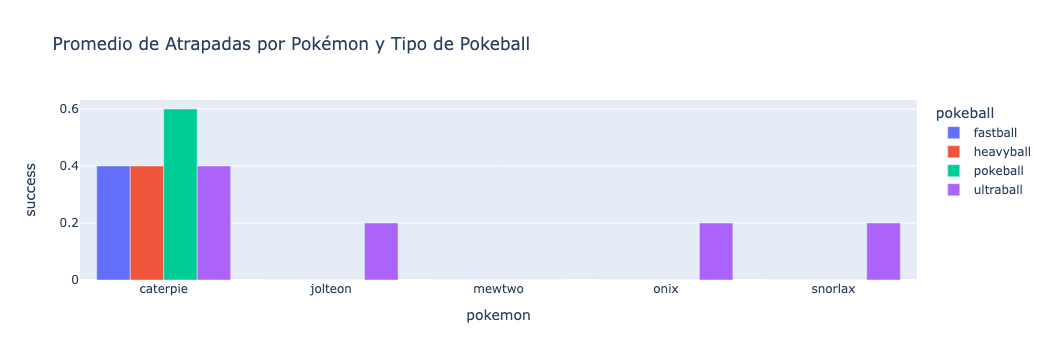

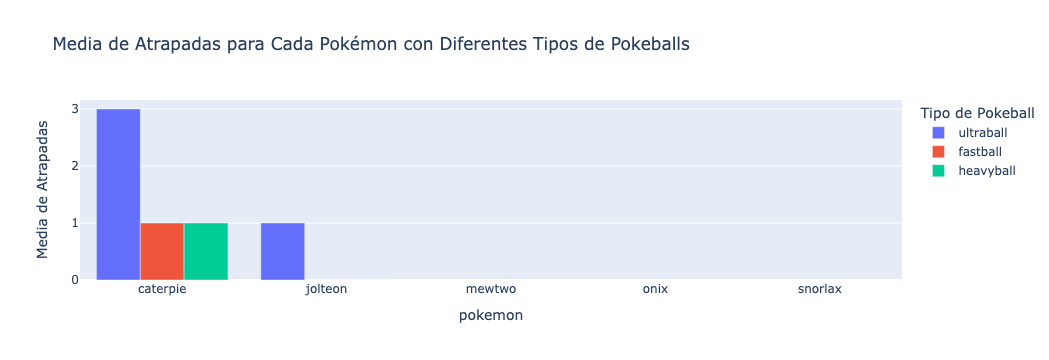

In [15]:
ejercicio1a()
ejercicio1b()